In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '/home/ubuntu/roger/Machine_Learning_Immunogenicity/src')
import onehot
from gzip import GzipFile
import copy
import sklearn as sk


In [2]:
%pwd

u'/home/roger/Machine_Learning_Immunogenicity'

In [3]:
tcell_all=pd.read_table("/home/roger/other/Machine_Learning_Immunogenicity/data/bcell.txt.gz",compression='gzip')
tcell_all.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(355780, 29)

In [8]:
tcell_comp=pd.read_table('/home/roger/other/Machine_Learning_Immunogenicity/data/bcell_peptide_nodups.txt.gz',compression='gzip')

In [9]:
print tcell_comp.shape

(246270, 2)


In [10]:
tcell_comp.head(10)

,Description,bin
0,EVETPIRN,1
1,EVSEKII,1
2,SETNKNPTSHSNSTTTSLNNN,1
3,MKNNPIYSEGSL,1
4,PAKAAAPPAA,1
5,STAIHADQLTPAWRIYSTGNN,1
6,IFGFNALVDR,1
7,TVVTTSVAEEGEEENQRGCE,1
8,GEEENQRGCEWESRQCQMRH,1
9,CMQWMRSMRGQYEESFLRSA,0


In [11]:
map(len,tcell_comp['Description'])

[8,
 7,
 21,
 12,
 10,
 21,
 10,
 20,
 20,
 20,
 23,
 10,
 8,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 11,
 10,
 10,
 10,
 11,
 17,
 9,
 9,
 10,
 8,
 9,
 11,
 9,
 10,
 10,
 10,
 9,
 10,
 9,
 9,
 10,
 9,
 20,
 18,
 18,
 15,
 18,
 16,
 15,
 18,
 15,
 16,
 15,
 16,
 18,
 7,
 30,
 31,
 15,
 35,
 42,
 31,
 32,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 19,
 17,
 17,
 17,
 17,
 20,
 17,
 17,
 17,
 17,
 15,
 6,
 6,
 14,
 27,
 33,
 42,
 16,
 16,
 16,
 16,
 11,
 20,
 12,
 26,
 12,
 4,
 10,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 12,
 7,
 28,
 12,
 10,
 18,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 20,
 15,
 15,
 15,
 8,
 7,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,


(array([244650,   1571,     10,      3,      4,      5,      1,      2,
            2,      1,      0,      0,      0,      0,      1,     11,
            2,      0,      6,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1]), array([   2.        ,   29.56666667,   57.13333333,   84.7       ,
        112.26666667,  139.83333333,  167.4       ,  194.96666667,
        222.53333333,  250.1       ,  277.66666667,  305.23333333,
        332.8       ,  360.36666667,  387.93333333,  415.5       ,
        443.06666667,  470.63333333,  498.2       ,  525.76666667,
        553.33333333,  580.9       ,  608.46666667,  636.03333333,
        663.6       ,  691.16666667,  718.73333333,  746.3       ,
        773.86666667,  801.43333333,  829.        ]))


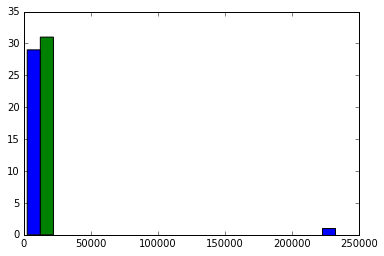

242198


In [12]:
print np.histogram(map(len,tcell_comp['Description']),bins=30)
plt.hist(np.histogram(map(len,tcell_comp['Description']),bins=30))
plt.show()
print np.sum(np.asarray(map(len,tcell_comp['Description'])) <= 20)

In [16]:
print np.sum(tcell_comp['bin'])
print tcell_comp.shape
tcell_comp.head(10)
#plt.hist(np.histogram(tcell_clean['Allele Name'],bins=50))
#plt.show()
#print np.sum(np.asarray(tcell_all['MHC Allele ID']) < 50)

27686
(246270, 2)


,Description,bin
0,EVETPIRN,1
1,EVSEKII,1
2,SETNKNPTSHSNSTTTSLNNN,1
3,MKNNPIYSEGSL,1
4,PAKAAAPPAA,1
5,STAIHADQLTPAWRIYSTGNN,1
6,IFGFNALVDR,1
7,TVVTTSVAEEGEEENQRGCE,1
8,GEEENQRGCEWESRQCQMRH,1
9,CMQWMRSMRGQYEESFLRSA,0


In [17]:
# scaling factors
tcell_clean=tcell_comp
print tcell_clean.columns

Index([u'Description', u'bin'], dtype='object')


In [18]:
def to_ascii(letter):
    if pd.isnull(letter):
        return 0
    else:
        return ord(letter)

In [19]:
print tcell_clean.shape
tcell_clean.index

(246270, 2)


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            246260, 246261, 246262, 246263, 246264, 246265, 246266, 246267,
            246268, 246269],
           dtype='int64', length=246270)

In [21]:
leng_seq=len(tcell_clean.Description.get(1))
print tcell_clean.bin.get(0)
print leng_seq
map(to_ascii,tcell_clean.Description.get(1))[:15]

1
7


[69, 86, 83, 69, 75, 73, 73]

In [60]:
number_data=tcell_clean.shape[0]
number_feature=20
tcell_data=np.zeros([number_data,number_feature+1])
print number_data
j=0
for i in tcell_clean.index:
    tcell_data[j,number_feature]=tcell_clean.bin.get(i)
    leng_seq=len(tcell_clean.Description.get(i))
    if leng_seq <=number_feature:
        tcell_data[j,:leng_seq]=map(to_ascii,tcell_clean.Description.get(i))
    else:
        tcell_data[j,:number_feature-1]=map(to_ascii,tcell_clean.Description.get(i))[:number_feature-1]
    j=j+1


246270


In [61]:
print tcell_data[3,:]

[ 77.  75.  78.  78.  80.  73.  89.  83.  69.  71.  83.  76.   0.   0.   0.
   0.   0.   0.   0.   0.   1.]


In [62]:
tcell_clean.head(10)

,Description,bin
0,EVETPIRN,1
1,EVSEKII,1
2,SETNKNPTSHSNSTTTSLNNN,1
3,MKNNPIYSEGSL,1
4,PAKAAAPPAA,1
5,STAIHADQLTPAWRIYSTGNN,1
6,IFGFNALVDR,1
7,TVVTTSVAEEGEEENQRGCE,1
8,GEEENQRGCEWESRQCQMRH,1
9,CMQWMRSMRGQYEESFLRSA,0


In [63]:
np.random.shuffle(tcell_data)
tcell_data[:2,:]
#tcell_shuf.dt

array([[ 73.,  76.,  75.,  69.,  76.,  70.,  73.,  80.,  86.,  65.,  82.,
         76.,  81.,  76.,  73.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 80.,  76.,  84.,  76.,  65.,  73.,  71.,  76.,  84.,  82.,  73.,
         83.,  82.,  84.,  68.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [64]:
tcell_array=np.asarray(tcell_data)
num_total=tcell_array.shape[0]
train_num=30000
valid_num=7000
test_num=num_total-train_num-valid_num
train_set=tcell_array[:train_num,:number_feature]
#train_lable=tcell_array[:train_num,number_feature]
train_lable=(np.arange(2)==tcell_array[:train_num,number_feature][:,None]).astype(np.float32)

valid_set=tcell_array[train_num:train_num+valid_num,:number_feature]
#valid_lable=tcell_array[]
valid_lable=(np.arange(2)==tcell_array[train_num:train_num+valid_num,number_feature][:,None]).astype(np.float32)

test_set=tcell_array[train_num+valid_num:,:number_feature]
#test_lable=tcell_array[train_num+valid_num:,number_feature]
test_lable=(np.arange(2)==tcell_array[train_num+valid_num:,number_feature][:,None]).astype(np.float32)

print train_set.shape, train_lable.shape, valid_set.shape, valid_lable.shape, test_set.shape, test_lable.shape

(30000, 20) (30000, 2) (7000, 20) (7000, 2) (209270, 20) (209270, 2)


In [84]:
number_feature1=number_feature
batch_size=100
hidden_size=20
num_lable=2
graph=tf.Graph()
with graph.as_default():
    train_set_batch=tf.placeholder(tf.float32,shape=(batch_size,number_feature1))
    train_lable_batch=tf.placeholder(tf.float32,shape=(batch_size,num_lable))
    
    valid_set_tf=tf.constant(valid_set.astype(np.float32))
    test_set_tf=tf.constant(test_set.astype(np.float32))
    
    weights1=tf.Variable(tf.truncated_normal([number_feature1,hidden_size]))
    bias1=tf.Variable(tf.zeros([hidden_size]))
    
    weights2=tf.Variable(tf.truncated_normal([hidden_size,num_lable]))
    bias2=tf.Variable(tf.zeros([num_lable]))
    
    logits1=tf.matmul(train_set_batch,weights1)+bias1
    act1=tf.nn.relu(logits1)
    logits=tf.matmul(act1,weights2)+bias2

    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits,train_lable_batch))
    
    optimizer=tf.train.GradientDescentOptimizer(0.00005).minimize(loss)
    
    train_pred=tf.nn.softmax(logits)
    valid_pred=tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(valid_set_tf,weights1)+bias1),weights2)+bias2)
    test_pred=tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(test_set_tf,weights1)+bias1),weights2)+bias2)

In [93]:
num_step=10000
def accuracy(predictions, labels):
    pre=np.argmax(predictions, 1.)
    lab=np.argmax(labels, 1.)
    #print pre[:100]
    #print lab[:100]
    posi=np.sum(pre*lab).astype(np.float32)/np.sum(lab).astype(np.float32)
    neg=np.sum((1.-pre)*(1.-lab)).astype(np.float32)/np.sum(1-lab).astype(np.float32)
    return 100.*np.array([2.*posi*neg/(posi+neg),posi,neg])

#(100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/predictions.shape[0])
train_accuracy=np.zeros(num_step)
valid_accuracy=np.zeros(num_step)
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for i in range(num_step):
        offset=i*batch_size % train_num
        train_set_feed=train_set[offset:offset+batch_size,:]
        train_lable_feed=train_lable[offset:offset+batch_size]
        feed_dict={train_set_batch:train_set_feed, train_lable_batch:train_lable_feed}
        _,l,pred=session.run([optimizer,loss,train_pred],feed_dict=feed_dict)
        #train_accuracy[i]=accuracy(pred, train_lable_feed)
        #valid_accuracy[i]=accuracy(valid_pred.eval(), valid_lable)
        if (i % 20)==0:
            print accuracy(pred, train_lable_feed)
            #print("Minibatch loss at step %d: %f" % (i, l))
            #print("Minibatch accuracy: %.1f%%" % accuracy(pred, train_lable_feed))
            #print("Validation accuracy: %.1f%%" % accuracy(valid_pred.eval(), valid_lable))
    #print("Test accuracy: %.1f%%" % accuracy(test_pred.eval(), test_lable))
    print accuracy(test_pred.eval(), test_lable)

Initialized
[   0.  100.    0.]
[ 81.45695472  75.          89.13043737]
[ 73.73396385  63.63636255  87.64045238]
[ 60.12176607  45.45454681  88.76404762]
[ 32.52747343  20.0000003   87.0588243 ]
[ 61.59999897  46.66666687  90.58823586]
[ 55.59322228  40.0000006   91.11111164]
[ 38.77551031  25.          86.36363745]
[ 36.80124262  23.07692319  90.80459476]
[ 42.08725628  27.27272809  92.13483334]
[ 52.32466647  36.36363745  93.25842857]
[ 24.66960332  14.28571492  90.32257795]
[ 16.4926931    9.09090936  88.76404762]
[ 24.70930371  14.28571492  91.39785171]
[ 36.70588108  23.07692319  89.65517282]
[ 14.18312444   7.69230798  90.80459476]
[ 21.92513377  12.5         89.13043737]
[ 30.24574591  18.18181872  89.88764286]
[ 16.63479923   9.09090936  97.75280952]
[  0.           0.          92.94117689]
[ 32.27272634  20.0000003   83.52941275]
[ 33.14285781  20.0000003   96.66666389]
[ 15.28301965   8.33333358  92.04545617]
[ 26.35914306  15.38461596  91.95402265]
[ 30.37036959  18.1818187

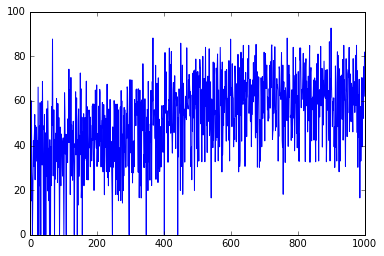

In [86]:
plt.plot(np.arange(1000),train_accuracy[:1000])
plt.show()